In [1]:
from datasets import load_dataset
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
dataset = load_dataset("hebrew_sentiment")

No config specified, defaulting to: hebrew_sentiment/token
Found cached dataset hebrew_sentiment (C:/Users/Administrator/.cache/huggingface/datasets/hebrew_sentiment/token/1.0.0/2ea2ba30503e863156a06ad2d4011a75b45556d1d557c2247f6194828849f5f9)


  0%|          | 0/2 [00:00<?, ?it/s]

In [3]:
# Convert to DataFrame
train_df = pd.DataFrame(dataset['train'])
test_df = pd.DataFrame(dataset['test'])

In [4]:
# Display the first few rows
print(train_df.head())

# Check for missing values
print(train_df.isnull().sum())
print(test_df.isnull().sum())

# Basic statistics
print(train_df.describe())


                                                text  label
0  ממש כואב ..... אני בוכה עם המשפחה שלא תדעו עוד...      0
1                                       איש יקר שלנו      0
2                              כל הכבוד והמון בהצלחה      0
3   תל חי , רובי . בכל העצב הזה היית קרן אור של ת...      0
4                 נקי כפיים ובר לבב בהצלחה לך ולנו .      0
text     0
label    0
dtype: int64
text     0
label    0
dtype: int64
             label
count  10244.00000
mean       0.36392
std        0.53823
min        0.00000
25%        0.00000
50%        0.00000
75%        1.00000
max        2.00000


In [10]:
# concat dfs
df = pd.concat([train_df, test_df])
print(df.shape)
print(df.label.value_counts())

(12804, 3)
0    8512
1    3922
2     370
Name: label, dtype: int64


In [5]:
train_df.to_csv('../data/train.csv', index=False)
test_df.to_csv('../data/test.csv', index=False)

In [6]:
# Function to calculate text length in words
def text_length(text):
    return len(text.split())

# Add a new column for text length
train_df['text_length'] = train_df['text'].apply(text_length)

# 1. Class distribution
class_distribution = train_df['label'].value_counts(normalize=True) * 100

# 2. Class meanings
class_meanings = {
    0: "Positive sentiment",
    1: "Negative sentiment",
    2: "Off-topic"
}

# 3. Print one example of each class
example_texts = train_df.groupby('label').first()['text']

# 4. Average and std tweet length
average_tweet_length = train_df['text_length'].mean()
std_tweet_length = train_df['text_length'].std()

# 5. Mean and std of text length per class
mean_std_per_class = train_df.groupby('label')['text_length'].agg(['mean', 'std'])

# 6. Most common words in the text
all_words = ' '.join(train_df['text'])
word_freq = Counter(all_words.split())
most_common_words = word_freq.most_common(10)

# 7. Most common words per class
most_common_words_per_class = {}
for label, group in train_df.groupby('label'):
    all_words_in_class = ' '.join(group['text'])
    word_freq_in_class = Counter(all_words_in_class.split())
    most_common_words_per_class[label] = word_freq_in_class.most_common(10)




0    66.516986
1    30.573995
2     2.909020
Name: label, dtype: float64

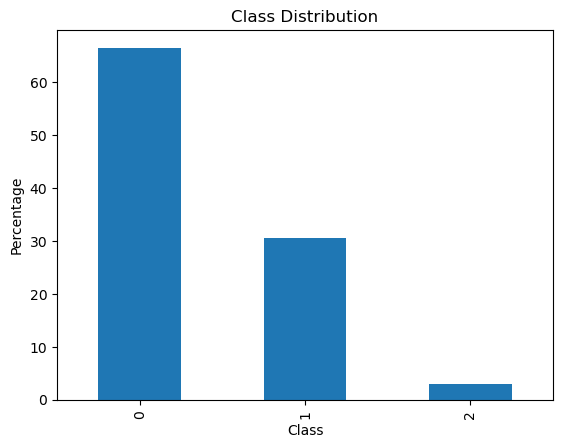

In [20]:
# Distribution
class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.show()


In [21]:
print("Examples by Class:")
for label, text in example_texts.items():
    print(f"Class {label} ({class_meanings[label]}): {text}")


Examples by Class:
Class 0 (Positive sentiment): ממש כואב ..... אני בוכה עם המשפחה שלא תדעו עוד צער
Class 1 (Negative sentiment): אדוני הנשיא סליחה על הבוטות תפסיק לזיין את השכל . עד היום לא התבטאת ולו במילה על המצב במדינה . לא הבעת את אהדתך לצבא . לא אמרת מילה טובה ומעודדת לתושבי הדרום . אם חשוב לך תשעה באב אז תחזור להסטוריה ותעלם מעינינו .
Class 2 (Off-topic): חייבים לעשות סוג של חרם כשכתבים שונאי ישראל עולים לשידור צריכים להעביר לערוץ אחר ואז תראו מה יעשה כוחו של הרייטינג ( בהקשר לדבריה של רינה מצליח )


In [22]:
average_tweet_length, std_tweet_length

(22.991019133151113, 43.31335117601367)

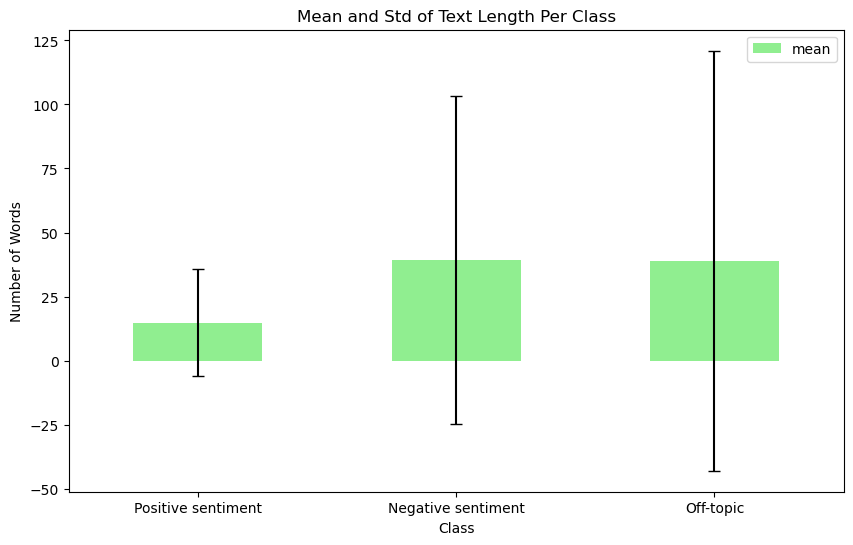

In [23]:
mean_std_per_class.plot(kind='bar', yerr='std', capsize=4, figsize=(10, 6), color='lightgreen')
plt.title('Mean and Std of Text Length Per Class')
plt.xlabel('Class')
plt.ylabel('Number of Words')
plt.xticks(ticks=range(len(class_meanings)), labels=[class_meanings[label] for label in mean_std_per_class.index], rotation=0)
plt.show()

In [33]:
# print the most common world per class:
print("Most common words:")
for label, words in most_common_words_per_class.items():
    print(f"Class {label} ({class_meanings[label]}): most common:")
    for word, freq in words:
        print(f"{word}: {freq}")

    print()

Most common words:
Class 0 (Positive sentiment): most common:
.: 4629
,: 2921
הנשיא: 1652
את: 1292
!: 1273
כל: 1025
של: 1001
בהצלחה: 985
ישראל: 985
נשיא: 967

Class 1 (Negative sentiment): most common:
,: 3606
.: 3597
לא: 2187
את: 2159
": 1735
של: 1234
על: 1222
עם: 1089
זה: 1055
ישראל: 947

Class 2 (Off-topic): most common:
,: 488
.: 323
את: 189
": 187
של: 153
לא: 121
!: 102
על: 91
עם: 83
כל: 77

